In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')
import matplotlib as plt 
import matplotlib.pyplot as plt


In [2]:
mv = pd.read_csv('my_movies.csv')
mv

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
df=pd.get_dummies(mv)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [16]:
frequent_itemsets1 = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets1

In [5]:
frequent_itemsets2 = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(V3_Sixth Sense, Gladiator, V2_Patriot, Patrio..."
77,0.4,"(V1_Gladiator, V3_Sixth Sense, Gladiator, V2_P..."
78,0.4,"(V1_Gladiator, V3_Sixth Sense, V2_Patriot, Pat..."
79,0.4,"(V1_Gladiator, V3_Sixth Sense, Gladiator, V2_P..."


In [6]:
frequent_itemsets3 = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.5,"(Gladiator, Sixth Sense)"
6,0.6,"(Patriot, Gladiator)"
7,0.6,"(V1_Gladiator, Gladiator)"
8,0.6,"(Gladiator, V2_Patriot)"
9,0.6,"(V1_Gladiator, Patriot)"


In [7]:
rules = association_rules(frequent_itemsets1, metric="lift", min_threshold=0.7)
rules
rules.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(Green Mile, V3_Harry Potter1, LOTR1, V5_LOTR2)","(Harry Potter1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
40479,"(Harry Potter1, V4_Green Mile, Sixth Sense)","(Green Mile, V3_Harry Potter1, V1_Sixth Sense,...",0.1,0.1,0.1,1.0,10.0,0.09,inf
40451,"(V5_LOTR2, Harry Potter1, V4_Green Mile, Sixth...","(Green Mile, V3_Harry Potter1, V1_Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
40452,"(Green Mile, V1_Sixth Sense, Harry Potter1, V5...","(V3_Harry Potter1, V4_Green Mile, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
40453,"(Green Mile, V1_Sixth Sense, Harry Potter1, Si...","(V5_LOTR2, V3_Harry Potter1, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
40454,"(V5_LOTR2, V1_Sixth Sense, Harry Potter1, Sixt...","(Green Mile, V3_Harry Potter1, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
40455,"(Green Mile, V5_LOTR2, Harry Potter1, Sixth Se...","(V3_Harry Potter1, V1_Sixth Sense, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
40456,"(Green Mile, V1_Sixth Sense, V4_Green Mile, V5...","(V3_Harry Potter1, Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
40458,"(V5_LOTR2, V1_Sixth Sense, V4_Green Mile, Sixt...","(Green Mile, V3_Harry Potter1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
40459,"(Green Mile, V5_LOTR2, V4_Green Mile, Sixth Se...","(V3_Harry Potter1, Harry Potter1, V1_Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf


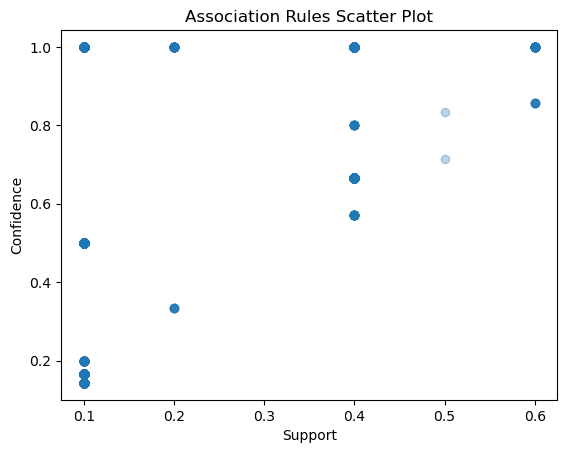

In [8]:
# Create a scatter plot of the association rules
plt.scatter(rules['support'], rules['confidence'], alpha=0.3)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules Scatter Plot')
plt.show()

In [9]:
rules = association_rules(frequent_itemsets2, metric="lift", min_threshold=0.7)
rules
rules.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
178,"(V1_Sixth Sense, V4_Green Mile)",(Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
319,"(Green Mile, V4_Green Mile)","(V1_Sixth Sense, Sixth Sense)",0.2,0.2,0.2,1.0,5.0,0.16,inf
40,(V1_Sixth Sense),(V4_Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
41,(V4_Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
181,(V4_Green Mile),"(Green Mile, V1_Sixth Sense)",0.2,0.2,0.2,1.0,5.0,0.16,inf
180,(V1_Sixth Sense),"(Green Mile, V4_Green Mile)",0.2,0.2,0.2,1.0,5.0,0.16,inf
179,(Green Mile),"(V1_Sixth Sense, V4_Green Mile)",0.2,0.2,0.2,1.0,5.0,0.16,inf
177,"(Green Mile, V4_Green Mile)",(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
176,"(Green Mile, V1_Sixth Sense)",(V4_Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
326,(V4_Green Mile),"(Green Mile, V1_Sixth Sense, Sixth Sense)",0.2,0.2,0.2,1.0,5.0,0.16,inf


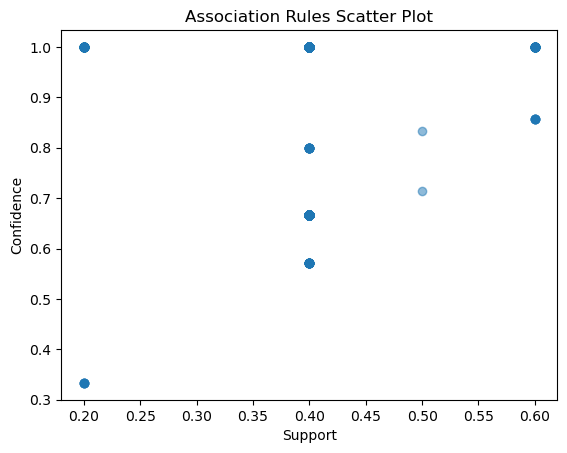

In [10]:
# Create a scatter plot of the association rules
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules Scatter Plot')
plt.show()

In [11]:
rules = association_rules(frequent_itemsets3, metric="lift", min_threshold=0.7)
rules
rules.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,"(V1_Gladiator, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
38,"(V1_Gladiator, Patriot, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
28,"(Gladiator, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
29,(V1_Gladiator),"(Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
31,(V2_Patriot),"(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
32,"(V1_Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
33,"(V1_Gladiator, V2_Patriot)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
34,"(Patriot, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
35,(V1_Gladiator),"(Patriot, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
36,(Patriot),"(V1_Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf


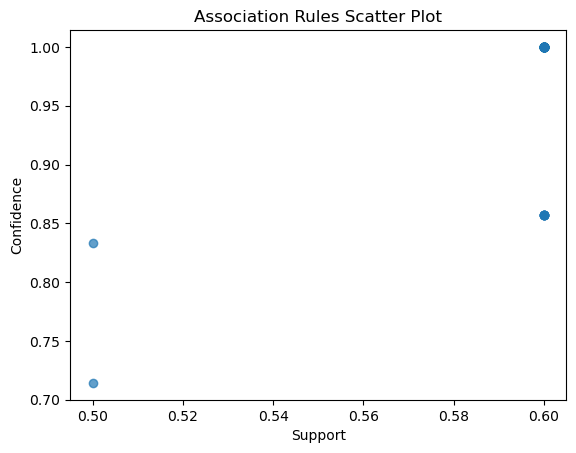

In [12]:
# Create a scatter plot of the association rules
plt.scatter(rules['support'], rules['confidence'], alpha=0.7)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules Scatter Plot')
plt.show()

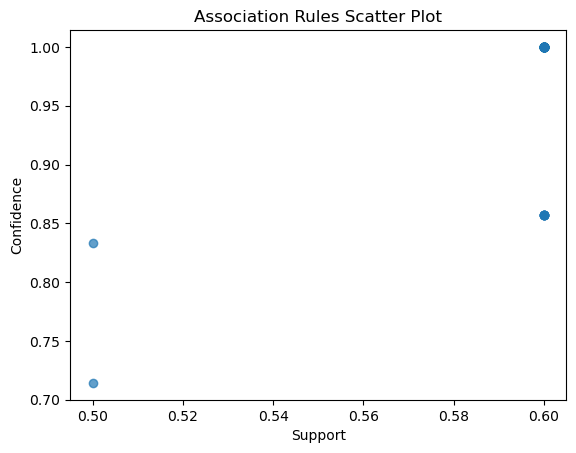

In [13]:
# Create a scatter plot of the association rules
plt.scatter(rules['support'], rules['confidence'], alpha=0.7)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules Scatter Plot')
plt.show()

In [14]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,"(V1_Gladiator, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
38,"(V1_Gladiator, Patriot, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
28,"(Gladiator, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
29,(V1_Gladiator),"(Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
31,(V2_Patriot),"(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
32,"(V1_Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
33,"(V1_Gladiator, V2_Patriot)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
34,"(Patriot, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
35,(V1_Gladiator),"(Patriot, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
36,(Patriot),"(V1_Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf


In [15]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
